# ModelNetのデータを可視化する

In [8]:
# OFFファイルを読み込む

import numpy as np
import os
import glob
import re
import random
import math

In [14]:
# OFFファイルを読み込む
def read_off(file):
    with open(file) as f:
        # ファイルの最初の3行を読み込む
        line = f.readline().strip()
        if line != 'OFF':
            print('This file is not .off file.')
            return
        line = f.readline().strip()
        # 頂点数と面数を読み込む
        nums = re.split(' +', line)
        num_vertices = int(nums[0])
        num_faces = int(nums[1])
        # 頂点座標を読み込む
        vertices = []
        for i in range(num_vertices):
            line = f.readline().strip()
            nums = re.split(' +', line)
            vertex = [float(nums[0]), float(nums[1]), float(nums[2])]
            vertices.append(vertex)
        # 面を構成する頂点インデックスを読み込む
        faces = []
        for i in range(num_faces):
            line = f.readline().strip()
            nums = re.split(' +', line)
            face = [int(nums[1]), int(nums[2]), int(nums[3])]
            faces.append(face)

    return vertices, faces

In [15]:
# 表示する
def show(vertices, faces):
    # 3D表示
    from mpl_toolkits.mplot3d import Axes3D
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_zlim(-1, 1)
    ax.plot(vertices[:, 0], vertices[:, 1], vertices[:, 2], "o", color="#cccccc", ms=4, mew=0.5)
    for face in faces:
        v0 = vertices[face[0]]
        v1 = vertices[face[1]]
        v2 = vertices[face[2]]
        x = [v0[0], v1[0], v2[0], v0[0]]
        y = [v0[1], v1[1], v2[1], v0[1]]
        z = [v0[2], v1[2], v2[2], v0[2]]
        ax.plot(x, y, z, color="k", lw=0.5)
    plt.show()

In [16]:
file = "data/ModelNet40/airplane/train/airplane_0001.off"
vertices, faces = read_off(file)

In [22]:
print(len(vertices))
print(len(faces))

90714
104773


In [23]:
vertices

[[20.967, -26.1154, 46.5444],
 [21.0619, -26.091, 46.5031],
 [-83.1524, -52.8062, 91.8328],
 [20.967, -26.1154, 46.5444],
 [0.572407, -48.35, 93.2093],
 [-83.1524, -39.1904, 45.6152],
 [-0.982059, -17.9486, 101.205],
 [19.8571, 21.6041, 74.449],
 [21.0619, -26.091, 46.5031],
 [-83.1524, -30.4404, 97.9034],
 [-84.4718, -71.9566, 86.9325],
 [-83.1524, -40.1029, 45.3471],
 [-84.4718, -67.4931, 87.3046],
 [154.407, -52.8062, 91.8328],
 [50.2872, -26.1154, 46.5444],
 [70.6818, -48.35, 93.2093],
 [154.407, -39.1904, 45.6152],
 [72.2362, -17.9486, 101.205],
 [51.3971, 21.6041, 74.449],
 [50.1922, -26.091, 46.5031],
 [154.407, -30.4404, 97.9034],
 [155.726, -71.9566, 86.9325],
 [154.407, -40.1029, 45.3471],
 [155.726, -67.4931, 87.3046],
 [26.2332, 40.0552, 80.1577],
 [25.1233, 39.557, 77.4126],
 [25.499, 38.9832, 80.1355],
 [25.8841, 40.5884, 77.6274],
 [25.8841, 40.5884, 77.6274],
 [26.2332, 40.0552, 80.1577],
 [25.1233, 39.557, 77.4126],
 [25.499, 38.9832, 80.1355],
 [25.4807, 40.1313, 74.6

TypeError: list indices must be integers or slices, not tuple

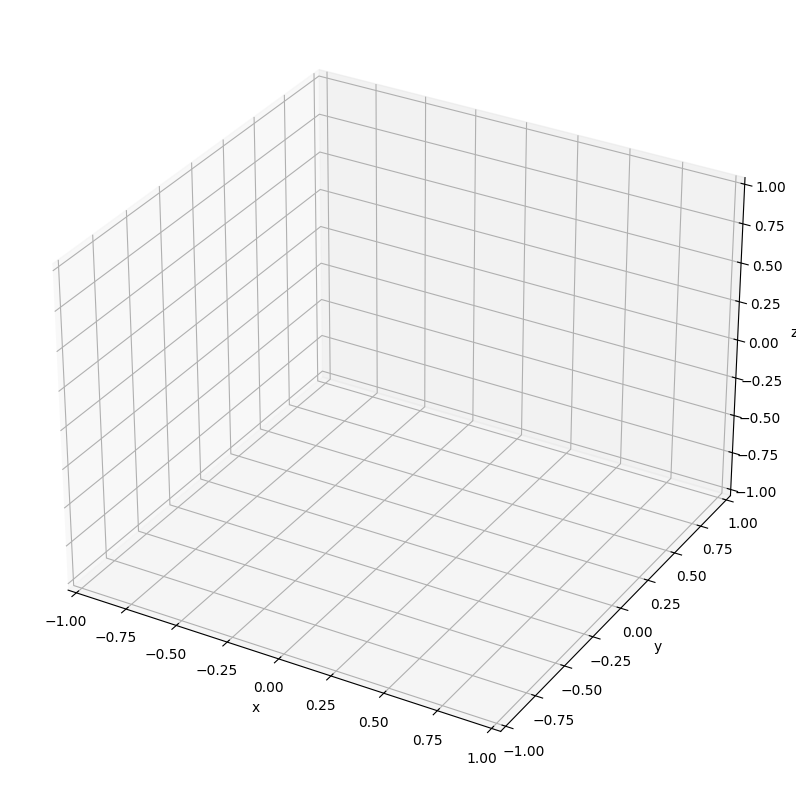

In [17]:
show(vertices, faces)